In [546]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [547]:
headername=['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model','Origin','Car']

In [548]:
data = pd.read_csv('auto-mpg.data',names=headername,delimiter="\s+")

In [549]:
data.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model         398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car           398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [551]:
data.Horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [552]:

data.Horsepower= data.Horsepower.str.replace('?', 'NaN',regex=True).astype(float)
data.Horsepower.fillna(data.Horsepower.mean(),inplace=True)
data.Horsepower = data.Horsepower.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int32  
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model         398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car           398 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 26.6+ KB


In [553]:
model=pd.DataFrame(data, columns = ['Mpg', 'Acceleration'])

In [554]:
#x_scaled = preprocessing.scale(x)
#x_scaled = pd.DataFrame(x_scaled,columns=x.columns)


In [555]:
X_train = model.Acceleration[:-20]

In [556]:
X_test = model.Acceleration[-20:]

In [557]:
y_train = model.Mpg[:-20]

In [558]:
y_test = model.Mpg[-20:]

In [559]:
regressor=LinearRegression()

In [560]:
print(X_train.shape,y_train.shape)

(378,) (378,)


In [561]:
X_train = X_train.values.reshape(len(X_train),1)
y_train = y_train.values.reshape(len(y_train),1)
X_test = X_test.values.reshape(len(X_test),1)
y_test = y_test.values.reshape(len(y_test),1)

In [562]:
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [543]:
print("Prediction--:",y_pred)
print("Coeff--:",regressor.coef_)
print("Intercept--:",regressor.intercept_)
#print("Residues--:",regressor.residues_)
print("R-Square Score--:",regressor.score(X_train,y_train))

Prediction--: [25.79919523 12.59683049 22.97978256 21.89447455 13.16499405 32.45297988
 13.51029773  8.88893463 10.2867906  18.98516083 28.44784126 27.78679322
 20.81456725 22.84789617 11.63822865 27.0705501  34.78786215 29.96922028
 23.71430491 22.11075901 22.03908139 21.24226787 28.95206267 31.86551615
  6.04897662  8.24852913 31.44289436 15.60251063  9.67152391 26.39395436
 14.10768994 25.21177426 31.31702707 16.50261935 21.04779756 32.06967651
 22.36173646 25.34410517 18.73336993 30.77344618 22.5186758  21.08600366
 17.6915707  30.50674759  5.11352811 24.81195286 15.24147174 10.54480997
 34.50417761 28.6350259  20.08150361  7.02586287 20.30303656 29.6605917
 30.11656388 25.19681532 26.55733378 33.3577275   8.27887812 25.56556312
 32.36957876 33.8358019  32.74486047 29.50552077 15.21144571 22.96080017
 24.94942254 24.15274954 33.2054807  28.42283798 20.16237864 22.50420205
 10.1546035  17.23098515 12.48086623 13.91357727 30.7978952  20.96483144
 20.75332592 11.44560216 25.66449839 1

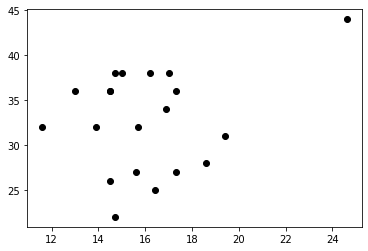

In [563]:
# Plot outputs
plt.scatter(X_test,y_test,color='black')

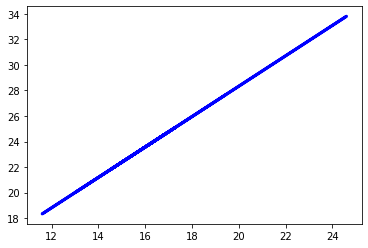

In [564]:
plt.plot(X_test,y_pred, color='blue',linewidth=3)

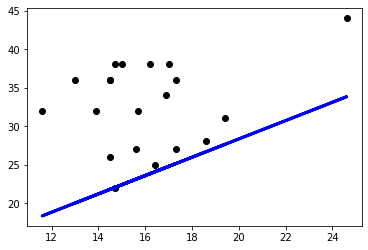

In [565]:
# Plot outputs

plt.plot(X_test,y_pred, color='blue',linewidth=3)
plt.scatter(X_test,y_test,  color='black')